### Exploratory Data Analysis - USDA Food Access Research Atlas (Tennessee data only)

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [22]:
tn_food_access_df = pd.read_csv('../data/tn_food_access.csv')

In [23]:
tn_food_access_df = tn_food_access_df.drop('CT_Old', axis=1)
tn_food_access_df = tn_food_access_df.drop('State', axis=1)

In [24]:
tn_food_access_df = tn_food_access_df.replace(r'^\s*$', np.nan, regex=True)

In [25]:
# tn_food_access_df_fillna.to_csv('tn_food_access_nan.csv')

Getting a general sense of the data ...

In [26]:
tn_food_access_df.head()

,CT_Clean,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,201.00,Anderson County,1,3111,1546,0,6,0.19,0,1,...,384,1969,853,130,2,9,148,145,206,438
1,202.01,Anderson County,1,3670,1535,0,103,2.81,0,0,...,658,3158,144,256,0,6,106,84,49,31
2,202.02,Anderson County,1,4507,2025,0,230,5.10,0,0,...,1364,3988,194,128,0,18,179,214,174,208
3,203.00,Anderson County,1,3822,1656,0,0,0.00,0,0,...,640,3290,278,20,3,18,213,179,53,109
4,204.00,Anderson County,1,4508,2013,0,106,2.35,1,1,...,761,3855,264,34,3,20,332,277,86,406


In [27]:
tn_food_access_df['CT_Clean'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1489 entries, 0 to 1488
Series name: CT_Clean
Non-Null Count  Dtype  
--------------  -----  
1489 non-null   float64
dtypes: float64(1)
memory usage: 11.8 KB


993 unique entries for census tract, yet 1,489 total? Need to look into this as a top priority.

In [28]:
tn_food_access_df['CT_Clean'].nunique()

993

In [29]:
# https://saturncloud.io/blog/how-to-check-for-duplicate-values-in-pandas-dataframe-column/#:~:text=To%20check%20for%20duplicate%20values%20in%20a%20Pandas%20DataFrame%20column,is%20a%20duplicate%20or%20not.
# duplicate_values = df['Product'].duplicated()
# print(duplicate_values)

duplicate_CTs = tn_food_access_df['CT_Clean'].duplicated()
duplicate_CTs_to_csv = pd.DataFrame(duplicate_CTs)
duplicate_CTs_to_csv.to_csv('duplicate_CTs.csv')


Pulling average, median, maximum and minimum population values. 

In [30]:
tn_food_access_df['Pop2010'].mean()

4261.991269308261

The average exceeds median population in Tennessee by about 200 people.

In [31]:
tn_food_access_df['Pop2010'].median()

4059.0

Maximum population in any census tract is 21,763 people in CT 501.01 Williamson County.

Williamson County is just south of Nashville and includes Franklin, TN.

In [32]:
# https://stackoverflow.com/questions/71828530/printing-the-whole-row-of-my-data-from-a-max-value-in-a-column
tn_food_access_df[tn_food_access_df['Pop2010'].iloc[:]==tn_food_access_df['Pop2010'].iloc[:].max()]

,CT_Clean,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
1467,512.02,Williamson County,1,21763,6999,0,0,0.0,0,0,...,869,19606,990,363,38,40,726,1217,58,150


Pulling minimum population, I'm seeing two lines that appear to have the same census tract number. 

Sevier County and Hamilton County are hours apart by car, so assuming this is some kind of database error.

* Sevier County is east and slightly south of Knoxville and includes Gatlinburg.

* Hamilton County is in southeast Tennessee and includes Chattanooga.

In [33]:
tn_food_access_df[tn_food_access_df['Pop2010'].iloc[:]==tn_food_access_df['Pop2010'].iloc[:].min()]

,CT_Clean,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
529,801.0,Hamilton County,1,1,1,0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1043,801.0,Sevier County,0,1,1,0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
# https://thinkingneuron.com/exporting-data-out-of-python/
# # Creating a DataFrame
# DataSample= [[10,'value1'], 
#              [20,'value2'], 
#              [30,'value3']]
# SimpleDataFrame=pd.DataFrame(data=DataSample, columns=['Col1','Col2'])
# print(SimpleDataFrame)
 
# # Exporting data frame to a csv/Excel file
# # Many other options are available which can be seen using dot tab option
 
# # Exporting data as a csv file
# SimpleDataFrame.to_csv('C:/Users/fhashmi/SimpleDataFrame.csv')
 
# # Exporting data as a excel file
# SimpleDataFrame.to_excel('C:/Users/fhashmi/SimpleDataFrameExcel.xlsx')

Saving a CSV to the data folder with population by county. (Also commenting it out so I don't get a new one each time I run the notebook.)

In [35]:
# data.groupby(['month','network_type'])['date'].count()
pop_by_county = tn_food_access_df.groupby(['County'])['Pop2010'].mean()
pop_by_county_to_csv = pd.DataFrame(pop_by_county)
# pop_by_county_to_csv.to_csv('pop_by_county.csv')

Maybe a few graphs to get started and help guide where to go.

In [42]:
# https://stackoverflow.com/questions/19442060/matplotlib-pyplot-titlestring-returns-error
# this was a fix for the title error I was getting ("'str' object is not callable")
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Text(0.5, 1.0, 'Total Population Count and Low Income Population')

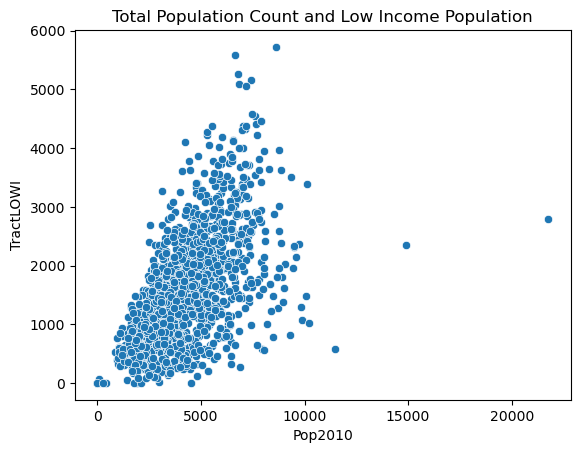

In [41]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='TractLOWI')
plt.title('Total Population and Low Income Population')

The above scatterplot isn't groundbreaking, but it does show that as total population increases, low income population does too. Makes sense, though the correlation seems like it's higher than I would have expected. Some more work here couldn't hurt. Maybe this? https://forecastegy.com/posts/correlation-between-two-time-series-python/

Text(0.5, 1.0, 'Total Population Count and Housing Units With SNAP')

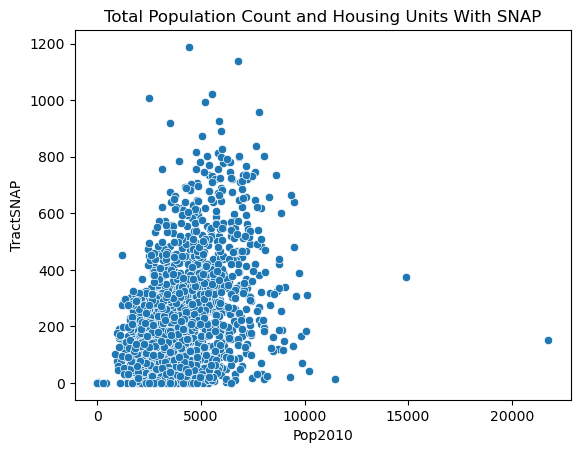

In [43]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='TractSNAP')
plt.title('Total Population and Housing Units With SNAP')

Text(0.5, 1.0, 'Total Population Count and Housing Units Without Vehicle Access')

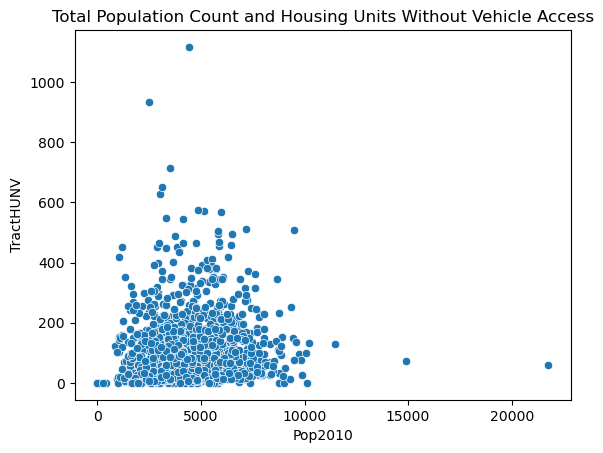

In [44]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='TractHUNV')
plt.title('Total Population and Housing Units Without Vehicle Access')

Going to have to rethink how I analyze the places with just a flag, like the LILATracts_1and20

Text(0.5, 1.0, 'Total Population and Low Access/Low Income at 1 Mile Urban and 20 Miles Rural')

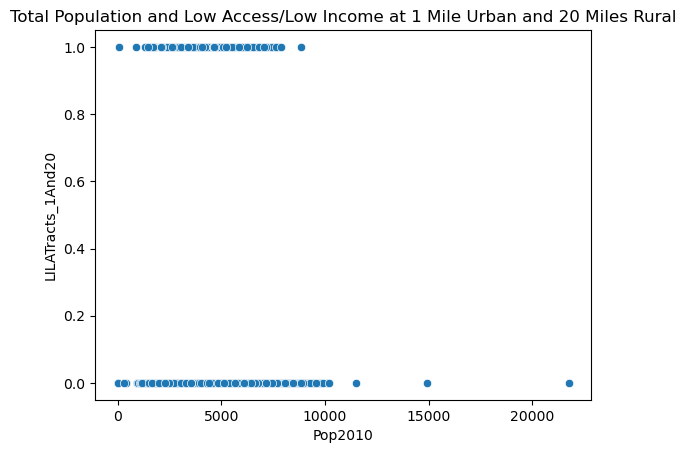

In [46]:
sns.scatterplot(data=tn_food_access_df, x='Pop2010', y='LILATracts_1And20')
plt.title('Total Population and Low Access/Low Income at 1 Mile Urban and 20 Miles Rural')